# Polynomial Regression

linear and non-linearity is based on coefficients b0, b1 , b2 ... so we are not taking about x variables when talking about linear

thats the reason desipte being non linear relation between x and y in polynomail linear regression it is called linear regression.

In [39]:
# Here we are comparing polynomial to linear model to see difference 

## Importing the libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [41]:
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Here we are trying to predict previous salaray of person we going to hire based on position

we assume he said his previous salary was 160K for position of Region manager

## Training the Linear Regression model on the whole dataset

In [42]:
# we wont split data as we have very lil data 
# we wont use position column as level represents the same thing 

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

From try different values for degree, 4 is the best value for this dataset

In [43]:
from sklearn.preprocessing import PolynomialFeatures # for getting x, x^2, x^3 poly features

poly_reg = PolynomialFeatures(degree=4) # x^degree (last feature)

x_poly = poly_reg.fit_transform(x) # transforms x into polynomial

lin_reg_2 = LinearRegression()

lin_reg_2.fit(x_poly, y)

LinearRegression()

## Visualising the Linear Regression results

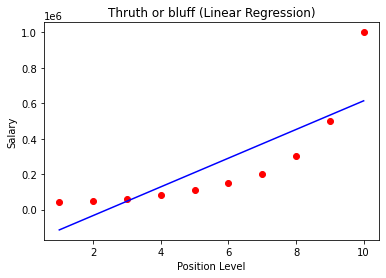

In [44]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Thruth or bluff (Linear Regression)') # about previous salary
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

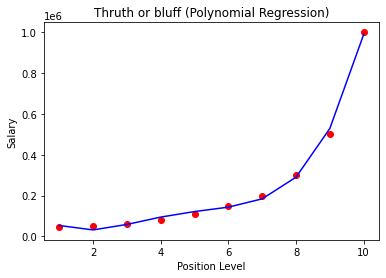

In [45]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Thruth or bluff (Polynomial Regression)') # about previous salary
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

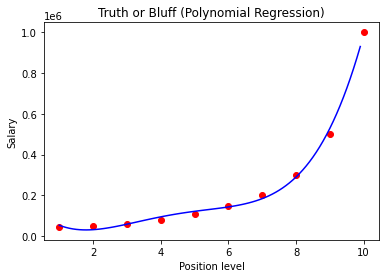

In [46]:
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [47]:
np.set_printoptions(precision=2) # for only 2 decimal points

In [48]:
print(lin_reg.predict([[6.5]]))

[330378.79]


## Predicting a new result with Polynomial Regression

In [49]:
print(lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))) # we have to transform prection x value as it takes degree=4, and it takes 2D array

[158862.45]
